In [98]:
#Importing Necessary Libraries
#Preprocessing Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

#Feature Selection Libraries
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# ML Libraries (Random Forest, Naive Bayes, SVM)
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
 
# Evaluation Metrics
from yellowbrick.classifier import ClassificationReport
from sklearn import metrics

In [99]:
df = pd.read_csv('Iris.csv', error_bad_lines=False)
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [51]:
df = df.drop(['Id'], axis=1)

In [52]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [53]:
df['Species'] = pd.factorize(df["Species"])[0] 
Target = 'Species'
df['Species'].unique()

array([0, 1, 2])

In [54]:
#Define Full Feature Set
Features = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
print('Full Features: ', Features)

Full Features:  ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']


In [57]:

# Feature Selection using Recursive Feature Elimination
# Split Dataframe to target class and features
X_fs = df[Features]
Y_fs = df[Target]
  
# Feature Selection Model Fitting
model = LogisticRegression(solver='lbfgs', multi_class='auto')

#Mark the Number of Features to be selected, Adjust this Number to enhance the Model Performance
rfe = RFE(model, 3) 
fit = rfe.fit(X_fs, Y_fs)

print("Number of Features Selected : %s" % (fit.n_features_))
print("Feature Ranking             : %s" % (fit.ranking_))
print("Selected Features           : %s" % (fit.support_))

# At Current Point, the attributes is select manually based on Feature Selection Part. 
Features = ['SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
print("Selected Features           :", Features)

Number of Features Selected : 3
Feature Ranking             : [2 1 1 1]
Selected Features           : [False  True  True  True]
Selected Features           : ['SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']


In [104]:
#Split dataset to Training Set & Test Set
x, y = train_test_split(df, 
                        test_size = 0.6, 
                        train_size = 0.4, 
                        random_state= 3)

x1 = x[Features]    #Features to train
x2 = x[Target]      #Target Class to train
y1 = y[Features]    #Features to test
y2 = y[Target]      #Target Class to test

print('Feature Set Used    : ', Features)
print('Target Class        : ', Target)
print('Training Set Size   : ', x.shape)
print('Test Set Size       : ', y.shape)

Feature Set Used    :  ['SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
Target Class        :  Species
Training Set Size   :  (60, 6)
Test Set Size       :  (90, 6)


In [105]:
# Random Forest
# Create Model with configuration
rf_model = RandomForestClassifier(n_estimators=150, # Number of trees
                                  min_samples_split = 30,
                                  bootstrap = True, 
                                  max_depth = 50, 
                                  min_samples_leaf = 25)

# Model Training
rf_model.fit(X=x1,
             y=x2)

# Prediction
result = rf_model.predict(y[Features])

In [107]:
# Model Evaluation
ac_sc = accuracy_score(y2, result)
rc_sc = recall_score(y2, result, average="weighted")
pr_sc = precision_score(y2, result, average="weighted")


print("Accuracy    : ", ac_sc)
print("Recall      : ", rc_sc)
print("Precision   : ", pr_sc)



Accuracy    :  0.3111111111111111
Recall      :  0.3111111111111111
Precision   :  0.09679012345679014


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


No handles with labels found to put in legend.


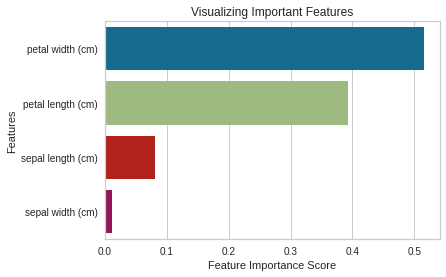

In [112]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)

# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()